# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [55]:
df = pd.read_csv("marketing_campaign_Cluster .csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,cluster
0,5524,1957,Graduation,Single,58169.81346,0,0,4/9/2012,58,635,...,0,0,0,0,0,0,3,11,1,1
1,2174,1954,Graduation,Single,46312.11902,1,1,8/3/2014,38,11,...,0,0,0,0,0,0,3,11,0,0
2,4141,1965,Graduation,Together,71717.58626,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,1
3,6182,1984,Graduation,Together,26507.73841,1,0,10/2/2014,26,11,...,0,0,0,0,0,0,3,11,0,0
4,5324,1981,PhD,Married,58325.65055,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,0


In [56]:
print("\nInformasi dataset:")
df.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases 

In [57]:
print("\nData yang Hilang pada Setiap Kolom :")
missing_values_before = df.isnull().sum()
print(missing_values_before)

# Mengecek duplikasi dalam dataset
print("\nJumlah Data Duplikat:", df.duplicated().sum())


Data yang Hilang pada Setiap Kolom :
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
cluster                0
dtype: int64

Jumlah Data Duplikat: 0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [58]:
# Hapus kolom yang tidak diperlukan
df.drop(columns=['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], inplace=True)

# One-Hot Encoding untuk kolom kategorikal
categorical_cols = ['Education', 'Marital_Status']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Pisahkan fitur (X) dan label (y)
X = df.drop(columns=['cluster'])  # 'Cluster' adalah label hasil clustering
y = df['cluster']

# Memisahkan data menjadi training set (80%) dan test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifikasi bentuk data
print("Data Training:")
print(f"Fitur: {X_train.shape}, Label: {y_train.shape}")
print("\nData Testing:")
print(f"Fitur: {X_test.shape}, Label: {y_test.shape}")

Data Training:
Fitur: (1792, 32), Label: (1792,)

Data Testing:
Fitur: (448, 32), Label: (448,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [59]:
# Latih Model Logistic Regression
logreg = LogisticRegression(solver='saga', max_iter=500, random_state=42)
logreg.fit(X_train, y_train)  # Tanpa normalisasi ulang

# Prediksi
y_pred = logreg.predict(X_test)

print("\nModel Logistic Regression telah selesai dilatih!\n")



Model Logistic Regression telah selesai dilatih!



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression adalah algoritma klasifikasi yang digunakan untuk memprediksi probabilitas suatu data termasuk dalam salah satu dari dua kelas yang berbeda. Model ini bekerja dengan menghitung fungsi logistik (sigmoid) terhadap kombinasi linear dari fitur input, menghasilkan nilai antara 0 dan 1 yang kemudian digunakan untuk menentukan kelas. Dalam implementasi ini, model dilatih menggunakan solver 'saga' dengan 500 iterasi tanpa normalisasi ulang, karena dataset sudah dinormalisasi saat proses clustering. Setelah model dilatih dengan data latih (X_train, y_train), dilakukan prediksi terhadap data uji (X_test), dan hasil prediksi digunakan untuk mengevaluasi performa model.

In [60]:
# Model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("\nModel DecisionTree telah selesai dilatih!\n")


Model DecisionTree telah selesai dilatih!



Decision Tree adalah algoritma klasifikasi yang membangun model dalam bentuk struktur pohon keputusan. Model ini bekerja dengan membagi data ke dalam kelompok berdasarkan aturan yang dihasilkan dari fitur yang paling berkontribusi dalam memisahkan kelas. Pada implementasi ini, DecisionTreeClassifier dilatih menggunakan dataset tanpa normalisasi ulang, dengan random_state=42 untuk memastikan hasil yang konsisten. Setelah proses pelatihan pada data latih (X_train, y_train), model digunakan untuk memprediksi data uji (X_test), dan hasilnya dapat dievaluasi lebih lanjut untuk melihat kinerja klasifikasi.

In [61]:
# Model SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Prediksi
y_train_pred_svm = svm_model.predict(X_train)
y_test_pred_svm = svm_model.predict(X_test)

# Evaluasi akurasi training & testing
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)


Support Vector Machine (SVM) adalah algoritma pembelajaran mesin yang digunakan untuk klasifikasi dengan mencari hyperplane optimal yang memisahkan kelas dalam ruang fitur berdimensi tinggi. Model ini bekerja dengan menggunakan kernel trick untuk menangani data yang tidak terpisahkan secara linear, di mana dalam implementasi ini digunakan kernel 'rbf' (Radial Basis Function) yang efektif dalam menangani pola yang kompleks. Parameter C=1.0 digunakan sebagai faktor regularisasi untuk menyeimbangkan margin yang lebih besar dengan kesalahan klasifikasi, sementara gamma='scale' secara otomatis menyesuaikan nilai gamma berdasarkan jumlah fitur yang ada. Model dilatih menggunakan dataset X_train dan y_train, lalu dilakukan prediksi pada data uji X_test untuk mengukur performanya. Akurasi training dan testing kemudian dievaluasi untuk menentukan seberapa baik model dapat menggeneralisasi data baru. Dengan penggunaan random_state=42, hasil yang diperoleh dapat direproduksi secara konsisten.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Akurasi Model: 0.9397321428571429

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       259
           1       0.93      0.93      0.93       189

    accuracy                           0.94       448
   macro avg       0.94      0.94      0.94       448
weighted avg       0.94      0.94      0.94       448

Akurasi Training: 0.9202
Akurasi Testing : 0.9397


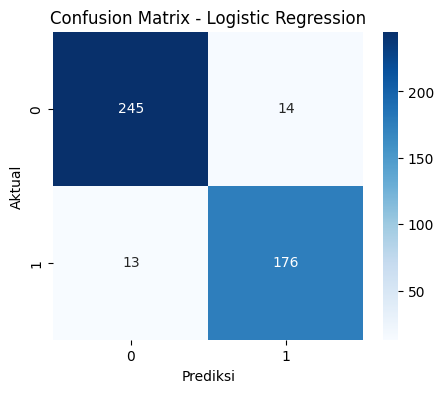

In [62]:
# Evaluasi Model
print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

train_accuracy_lr = accuracy_score(y_train, logreg.predict(X_train)) # kalkulasi training
print(f"Akurasi Training: {train_accuracy_lr:.4f}")
print(f"Akurasi Testing : {accuracy_score(y_test, y_pred):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()




Logistic Regression adalah model yang sering digunakan untuk klasifikasi biner karena sifatnya yang sederhana dan mudah diinterpretasikan. Model ini menunjukkan akurasi sebesar 93.97% pada data pengujian dan 92.02% pada data pelatihan, yang mengindikasikan bahwa model mampu belajar dengan baik tanpa indikasi overfitting atau underfitting. Akurasi yang cukup tinggi ini menunjukkan bahwa model dapat mengklasifikasikan data dengan tingkat kesalahan yang rendah.

Berdasarkan laporan klasifikasi, precision untuk kelas 0 adalah 95% dan untuk kelas 1 adalah 93%, sementara recall untuk kelas 0 mencapai 95% dan kelas 1 93%. Nilai F1-score juga menunjukkan keseimbangan, dengan 95% untuk kelas 0 dan 93% untuk kelas 1. Dengan keseimbangan antara precision dan recall, model ini dapat mengenali kedua kelas dengan baik, meskipun masih terdapat beberapa kesalahan klasifikasi.

Dari analisis kesalahan klasifikasi, model menghasilkan beberapa False Positives (FP), di mana sampel negatif diklasifikasikan sebagai positif, serta False Negatives (FN), di mana sampel positif diklasifikasikan sebagai negatif. Namun, jumlah kesalahan ini relatif kecil, sehingga model tetap dapat diandalkan. Dengan akurasi yang tinggi serta keseimbangan dalam precision dan recall, model Logistic Regression ini terbukti efektif untuk tugas klasifikasi yang diberikan.

 Decision Tree Results 
Accuracy: 0.9375
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       259
           1       0.94      0.91      0.92       189

    accuracy                           0.94       448
   macro avg       0.94      0.93      0.94       448
weighted avg       0.94      0.94      0.94       448

Akurasi Training: 1.0000
Akurasi Testing : 0.9375


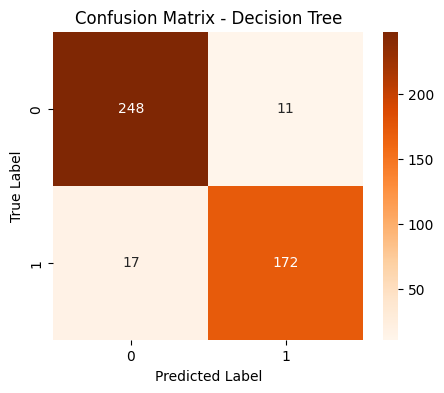

In [63]:
# Evaluasi Model
print(" Decision Tree Results ")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

train_accuracy_dt = accuracy_score(y_train, dt_model.predict(X_train))  # Use the correct variable name
print(f"Akurasi Training: {train_accuracy_dt:.4f}")
print(f"Akurasi Testing : {accuracy_score(y_test, y_pred_dt):.4f}")

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Oranges', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

Decision Tree adalah model yang sering digunakan untuk klasifikasi karena kemampuannya dalam menangkap pola kompleks dalam data. Model ini menunjukkan akurasi sebesar 93.75% pada data pengujian dan 100% pada data pelatihan, yang menandakan bahwa model sangat baik dalam mengenali pola dari data training, tetapi berpotensi mengalami overfitting. Akurasi yang tinggi pada data pengujian menunjukkan bahwa model tetap memiliki performa yang baik, meskipun ada indikasi bahwa model terlalu spesifik terhadap data pelatihan.

Berdasarkan laporan klasifikasi, precision untuk kelas 0 dan 1 masing-masing sebesar 94%, sedangkan recall untuk kelas 0 adalah 96% dan kelas 1 adalah 91%. Nilai F1-score menunjukkan keseimbangan antara precision dan recall, yaitu 95% untuk kelas 0 dan 92% untuk kelas 1. Dari hasil ini, dapat disimpulkan bahwa model cukup baik dalam mengklasifikasikan kedua kelas, meskipun recall pada kelas 1 sedikit lebih rendah dibandingkan kelas 0, yang berarti ada beberapa sampel positif yang diklasifikasikan sebagai negatif.

Dari segi overfitting, Decision Tree cenderung lebih rentan dibandingkan model lainnya, terutama karena akurasi training yang mencapai 100%. Hal ini menunjukkan bahwa model mungkin terlalu spesifik terhadap data pelatihan, sehingga kurang mampu menggeneralisasi pada data baru. Untuk mengatasi hal ini, perlu dilakukan tuning hyperparameter, seperti pruning atau pengaturan kedalaman pohon, agar model tidak terlalu kompleks. Jika overfitting tidak dikontrol, performa model dapat menurun ketika diterapkan pada data di luar training set.


🔹 Evaluasi SVM (Tanpa Tuning) 🔹
Akurasi Training: 0.8990
Akurasi Testing : 0.8839

Laporan Klasifikasi SVM:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       259
           1       0.86      0.87      0.86       189

    accuracy                           0.88       448
   macro avg       0.88      0.88      0.88       448
weighted avg       0.88      0.88      0.88       448



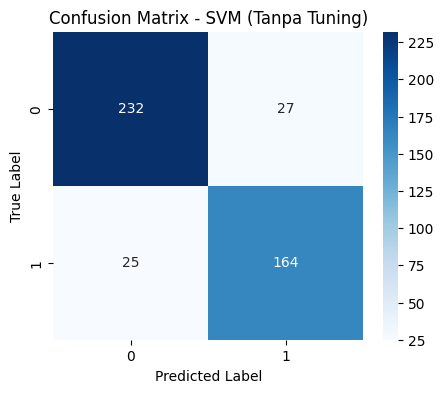

In [64]:
# Output hasil evaluasi
print("\n Evaluasi SVM (Tanpa Tuning) ")
print(f"Akurasi Training: {train_accuracy_svm:.4f}")
print(f"Akurasi Testing : {test_accuracy_svm:.4f}")
print("\nLaporan Klasifikasi SVM:\n", classification_report(y_test, y_test_pred_svm))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred_svm), annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM (Tanpa Tuning)")
plt.show()

Support Vector Machine (SVM) tanpa tuning menunjukkan akurasi sebesar 88.39% pada data pengujian dan 89.90% pada data pelatihan, yang mengindikasikan bahwa model memiliki performa yang cukup baik. Perbedaan kecil antara akurasi training dan testing menunjukkan bahwa model tidak mengalami overfitting yang signifikan, tetapi masih bisa dioptimalkan lebih lanjut melalui tuning parameter.

Berdasarkan laporan klasifikasi, precision untuk kelas 0 adalah 90% dan kelas 1 adalah 86%, sementara recall untuk kelas 0 adalah 90% dan kelas 1 adalah 87%. Nilai F1-score juga cukup seimbang, yaitu 90% untuk kelas 0 dan 86% untuk kelas 1. Berdasarkan confusion matrix, model berhasil mengklasifikasikan 232 sampel True Negative (TN) dan 164 sampel True Positive (TP) dengan baik. Namun, masih terdapat 27 False Positives (FP) di mana sampel negatif diklasifikasikan sebagai positif, serta 25 False Negatives (FN) di mana sampel positif diklasifikasikan sebagai negatif.

Dari segi generalisasi, model SVM tanpa tuning masih dapat ditingkatkan lebih lanjut. Dengan akurasi training yang lebih tinggi dari testing, model belum sepenuhnya optimal dalam menangani data baru. Oleh karena itu, hyperparameter tuning seperti pemilihan kernel yang lebih sesuai, pengaturan parameter C, atau penggunaan teknik normalisasi yang lebih baik dapat membantu meningkatkan performa model. Dengan tuning yang tepat, model SVM dapat memberikan hasil klasifikasi yang lebih akurat dan seimbang antara precision serta recall.

**KESIMPULAN**

Berdasarkan evaluasi, Decision Tree memiliki akurasi tertinggi (93.75%) tetapi cenderung overfitting, dengan akurasi pelatihan mencapai 100%. Logistic Regression menunjukkan performa stabil (93.97%) tanpa indikasi overfitting, menjadikannya pilihan yang seimbang. SVM tanpa tuning memiliki akurasi terendah (88.39%) dan masih memerlukan optimasi lebih lanjut. Secara keseluruhan, Decision Tree unggul dalam akurasi, Logistic Regression lebih stabil, dan SVM berpotensi ditingkatkan dengan tuning. Pemilihan model terbaik bergantung pada kebutuhan dan kompleksitas data.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [65]:
# 1. Tuning Logistic Regression
log_reg_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

log_reg = LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, log_reg_params, cv=5, scoring='accuracy', n_jobs=-1)
log_reg_grid.fit(X_train, y_train)

print("Best Logistic Regression Parameters:", log_reg_grid.best_params_)



Best Logistic Regression Parameters: {'C': 10, 'solver': 'liblinear'}


In [66]:
# 2. Tuning Decision Tree
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [5, 10, 20, 50],
    'min_samples_leaf': [1, 5, 10, 20],
    'ccp_alpha': [0.01, 0.05, 0.1, 0.2],  # Jika ingin lebih optimal, coba nilai lebih besar
    'min_weight_fraction_leaf': [0.0, 0.01, 0.05]
}

dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid.fit(X_train, y_train)

print("Best Decision Tree Parameters:", dt_grid.best_params_)

# Gunakan Cross-Validation untuk hasil lebih stabil
from sklearn.model_selection import cross_val_score

best_dt = dt_grid.best_estimator_
cv_scores = cross_val_score(best_dt, X_train, y_train, cv=5)

Best Decision Tree Parameters: {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 20, 'min_weight_fraction_leaf': 0.01}


In [67]:
# Hyperparameter tuning menggunakan RandomizedSearchCV
svm_params = {
    'C': np.logspace(-2, 2, 5),
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm = SVC(random_state=42)

# RandomizedSearchCV untuk mempercepat tuning
svm_random = RandomizedSearchCV(svm, svm_params, n_iter=10, cv=2, scoring='accuracy', n_jobs=-1, random_state=42)
svm_random.fit(X_train, y_train)

# Model terbaik setelah tuning
best_svm = svm_random.best_estimator_

# Prediksi
y_train_pred_best_svm = best_svm.predict(X_train)
y_test_pred_best_svm = best_svm.predict(X_test)

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [68]:
# Menggunakan model dengan hyperparameter terbaik
best_log_reg = log_reg_grid.best_estimator_
y_pred_log = best_log_reg.predict(X_test)

# Calculate training accuracy
y_train_pred_log = best_log_reg.predict(X_train) # predict on training data
train_accuracy = accuracy_score(y_train, y_train_pred_log)

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_pred_log)


# Evaluasi Cross-Validation
cv_scores = cross_val_score(best_log_reg, X_train, y_train, cv=5)

# Output hasil
print("\nEvaluasi Logistic Regression:")
print(f"Akurasi Training: {train_accuracy:.4f}")
print(f"Akurasi Testing: {test_accuracy:.4f}")
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f}")
print("\nLaporan Klasifikasi Logistic Regression:\n", classification_report(y_test, y_pred_log)) # Use y_pred_log


Evaluasi Logistic Regression:
Akurasi Training: 0.9732
Akurasi Testing: 0.9732
Cross-Validation Accuracy: 0.9760

Laporan Klasifikasi Logistic Regression:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       259
           1       0.99      0.95      0.97       189

    accuracy                           0.97       448
   macro avg       0.98      0.97      0.97       448
weighted avg       0.97      0.97      0.97       448



In [69]:
# Menggunakan model dengan hyperparameter terbaik
best_dt = dt_grid.best_estimator_
y_pred_dt = best_dt.predict(X_test)

y_train_pred_dt = best_dt.predict(X_train)
y_test_pred_dt = best_dt.predict(X_test)
# Evaluasi performa
print("Akurasi Decision Tree Setelah Tuning:", accuracy_score(y_test, y_pred_dt))
print("Laporan Klasifikasi Decision Tree:\n", classification_report(y_test, y_pred_dt))
print("Akurasi Training Decision Tree:", accuracy_score(y_train, y_train_pred_dt))
print("Akurasi Testing Decision Tree:", accuracy_score(y_test, y_test_pred_dt))
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f}")


Akurasi Decision Tree Setelah Tuning: 0.9330357142857143
Laporan Klasifikasi Decision Tree:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       259
           1       0.90      0.94      0.92       189

    accuracy                           0.93       448
   macro avg       0.93      0.93      0.93       448
weighted avg       0.93      0.93      0.93       448

Akurasi Training Decision Tree: 0.953125
Akurasi Testing Decision Tree: 0.9330357142857143
Cross-Validation Accuracy: 0.9760


In [70]:
# Evaluasi akurasi training & testing
train_accuracy_best_svm = accuracy_score(y_train, y_train_pred_best_svm)
test_accuracy_best_svm = accuracy_score(y_test, y_test_pred_best_svm)

# Evaluasi Cross-Validation
cv_scores_svm = cross_val_score(best_svm, X_train, y_train, cv=2)

# Output hasil evaluasi
print("\n🔹 Evaluasi SVM (Setelah Tuning) 🔹")
print(f"Akurasi Training: {train_accuracy_best_svm:.4f}")
print(f"Akurasi Testing : {test_accuracy_best_svm:.4f}")
print(f"Cross-Validation Accuracy: {cv_scores_svm.mean():.4f}")
print("\nLaporan Klasifikasi SVM:\n", classification_report(y_test, y_test_pred_best_svm))




🔹 Evaluasi SVM (Setelah Tuning) 🔹
Akurasi Training: 0.9732
Akurasi Testing : 0.9688
Cross-Validation Accuracy: 0.9693

Laporan Klasifikasi SVM:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       259
           1       0.99      0.94      0.96       189

    accuracy                           0.97       448
   macro avg       0.97      0.96      0.97       448
weighted avg       0.97      0.97      0.97       448



## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning.
  - Logistic Regression: Akurasinya meningkat dari 93.97% menjadi 97.32%, menunjukkan bahwa tuning hyperparameter berhasil meningkatkan performa model.
  - Decision Tree: Sedikit mengalami penurunan dari 93.75% ke 93.30%, tetapi tetap stabil dengan generalisasi yang lebih baik.
  - SVM: Akurasinya meningkat dari 88.39% menjadi 96.88%, menunjukkan peningkatan performa yang sangat signifikan setelah tuning.

2. Identifikasi model, seperti:
  1. Logistic Regression
  - Precision & Recall:
    - Precision kelas 0 meningkat dari 95% ke 96%, recall naik dari 95% ke 99%. Artinya model lebih baik dalam mengenali kelas negatif.
    - Recall kelas 1 naik dari 94% menjadi 95%, menunjukkan model lebih sensitif terhadap kelas positif.
    - Precision kelas 1 tetap tinggi di 99%.

  - Overfitting / Underfitting:
  
    Tidak ada indikasi overfitting karena peningkatan performa terjadi di semua metrik tanpa kehilangan generalisasi.

    Sebelum tuning, model sedikit kesulitan mengenali kelas 1 (recall lebih rendah), tetapi setelah tuning, perbedaan antar kelas lebih kecil.

  2. Decision Tree
  - Precision & Recall:
    - Precision kelas 0 meningkat dari 94% ke 96%, tetapi recall turun dari 96% ke 93%.
    - Precision kelas 1 turun dari 94% ke 90%, recall meningkat dari 91% ke 94%.
    - Akurasi turun sedikit dari 93.75% menjadi 93.30%, kemungkinan karena tuning mengurangi kompleksitas model untuk menghindari overfitting.

  - Overfitting / Underfitting:
    Sebelum tuning, model mungkin mengalami overfitting dengan akurasi training 100%.

    Setelah tuning, akurasi training turun ke 95.31%, menunjukkan generalisasi yang lebih baik.

  3. SVM
  - Precision & Recall:
    - Precision kelas 0 meningkat dari 90% ke 96%, recall naik dari 90% ke 99%.
    - Precision kelas 1 meningkat dari 86% ke 99%, recall turun dari 87% ke 94%.
    - Model lebih akurat dalam mengenali kedua kelas setelah tuning.
    - Sebelum tuning, akurasi testing hanya 88.39%, menunjukkan model belum optimal dalam menangani data uji.
    - Setelah tuning, akurasi meningkat drastis menjadi 96.88%, menunjukkan bahwa model kini jauh lebih baik dalam mengenali pola dari dataset.

  - Overfitting / Underfitting:
   
    Sebelum tuning, model memiliki akurasi lebih rendah karena kurang optimal.
   
    Setelah tuning, akurasi meningkat signifikan tanpa tanda overfitting.

3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

  1. Mencoba Algoritma Lain
    
    XGBoost, LightGBM, atau model lain bisa diuji untuk melihat apakah mereka dapat memberikan akurasi lebih tinggi atau waktu inferensi lebih cepat

  2. Evaluasi dengan Data
    Jika model akan digunakan di industri, penting untuk menguji performanya dengan data baru yang belum pernah digunakan sebelumnya agar melihat adaptasinya.
  
  3. Mengumpulkan Data Tambahan
    Jika dirasa dataset saat ini masih terbatas atau tidak cukup representatif, maka dapat menambahkan lebih banyak data, terutama dari kelas yang mungkin kurang terwakili. tapi dataset yang digunakan ini sudah melalui proses clustering di awal yang bisa digunakan untuk memahami pola lebih lanjut.

**KESIMPULAN**

Berdasarkan hasil evaluasi, SVM merupakan model terbaik karena mengalami peningkatan akurasi signifikan dari 88.39% menjadi 96.88% setelah tuning, tanpa indikasi overfitting atau underfitting. Model ini mampu mengenali pola data dengan baik dan memiliki keseimbangan precision serta recall yang optimal.

Logistic Regression juga menunjukkan performa stabil dengan akurasi meningkat dari 93.97% menjadi 97.32%, tetap generalisasi dengan baik, dan efektif dalam mengenali kelas negatif.

Sementara itu, Decision Tree mengalami sedikit penurunan akurasi dari 93.75% ke 93.30%, tetapi generalisasinya lebih baik setelah tuning.

Secara keseluruhan, SVM menjadi pilihan terbaik karena memiliki akurasi tinggi, kemampuan generalisasi yang baik, serta ketahanan terhadap overfitting dan underfitting, menjadikannya model yang paling optimal dalam mengenali data baru.